<a href="https://colab.research.google.com/github/vajihe-ameri/predict-software-bugs-in-java-classes/blob/main/MLPByClass0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install sklearn pandas

import pandas as pd
from google.colab import drive
drive = drive.mount('/content/drive')

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post7-py3-none-any.whl size=2952 sha256=63053bd5d5404b8f737ddfe8889da6e21ef0e7564774e054c202f56e691f786a
  Stored in directory: /root/.cache/pip/wheels/c8/9c/85/72901eb50bc4bc6e3b2629378d172384ea3dfd19759c77fd2c
Successfully built sklearn
Mounted at /content/drive


In [3]:
!pip install tensorflow-addons
import tensorflow_addons
f_measure = tensorflow_addons.metrics.F1Score(num_classes=2, average='macro', threshold=0.5)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 11.3 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [4]:
test_features = pd.read_csv("/content/drive/MyDrive/new_df/test_set_0.csv")
train_features = pd.read_csv("/content/drive/MyDrive/new_df/train_set_0.csv")
test_target = pd.read_csv("/content/drive/MyDrive/new_df/test_set_NB_0.csv")
train_target = pd.read_csv("/content/drive/MyDrive/new_df/train_set_NB_0.csv")


In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.constraints import max_norm
from keras.callbacks import ModelCheckpoint
import numpy
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
file_path = "/content/drive/MyDrive/new_df/best_model_by_class0.hdf5"

In [6]:
#***Build Model***#
#-----------------#
model = Sequential()

model.add(Dense(100, kernel_initializer = 'uniform', activation = 'relu', input_dim = train_features.shape[1]))
model.add(Dense(120, kernel_initializer = 'uniform', kernel_constraint=max_norm(2.), activation = 'relu'))
model.add(Dense(140, kernel_initializer = 'uniform', kernel_constraint=max_norm(2.), activation = 'relu'))
model.add(Dense(160, kernel_initializer = 'uniform', kernel_constraint=max_norm(2.), activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

checkpoint = ModelCheckpoint(file_path, monitor='loss', verbose=1,save_best_only=True, mode='auto', period=1)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               8500      
                                                                 
 dense_1 (Dense)             (None, 120)               12120     
                                                                 
 dense_2 (Dense)             (None, 140)               16940     
                                                                 
 dense_3 (Dense)             (None, 160)               22560     
                                                                 
 dense_4 (Dense)             (None, 1)                 161       
                                                                 
Total params: 60,281
Trainable params: 60,281
Non-trainable params: 0
_________________________________________________________________


Streaming output truncated to the last 5000 lines.
27/28 [===========================>..] - ETA: 0s - loss: 0.1767 - accuracy: 0.9051
Epoch 3752: loss did not improve from 0.17394
28/28 [==============================] - 1s 21ms/step - loss: 0.1770 - accuracy: 0.9048 - val_loss: 3.7086 - val_accuracy: 0.5252
Epoch 3753/5000
26/28 [==========================>...] - ETA: 0s - loss: 0.1821 - accuracy: 0.9039
Epoch 3753: loss did not improve from 0.17394
28/28 [==============================] - 1s 21ms/step - loss: 0.1830 - accuracy: 0.9034 - val_loss: 3.7176 - val_accuracy: 0.5299
Epoch 3754/5000
25/28 [=========================>....] - ETA: 0s - loss: 0.1814 - accuracy: 0.9027
Epoch 3754: loss did not improve from 0.17394
28/28 [==============================] - 1s 25ms/step - loss: 0.1842 - accuracy: 0.9009 - val_loss: 3.7176 - val_accuracy: 0.5360
Epoch 3755/5000
26/28 [==========================>...] - ETA: 0s - loss: 0.1820 - accuracy: 0.9028
Epoch 3755: loss did not improve from 0.1

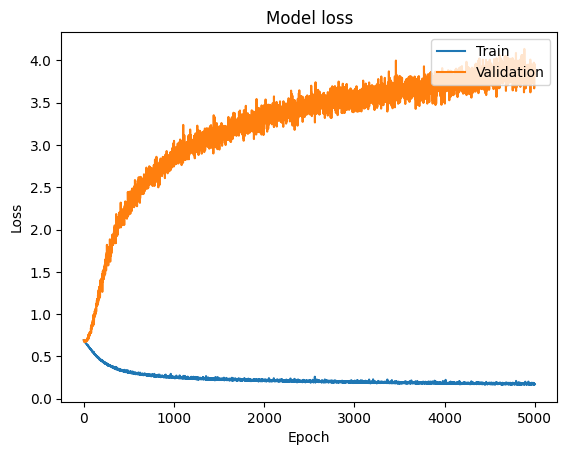



*********************************************




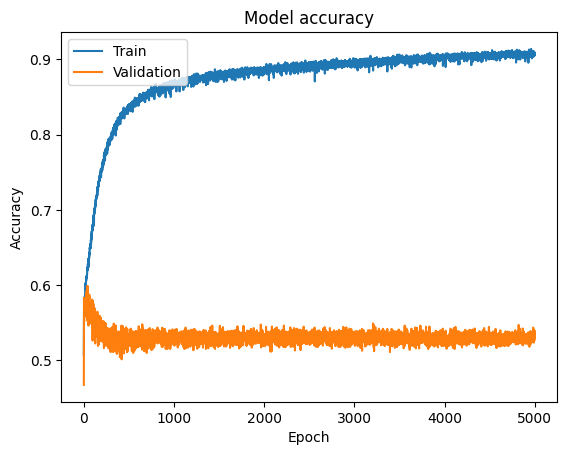



*********************************************
Test-set evaluate result:

131/131 [==============================] - 0s 3ms/step - loss: 3.8022 - accuracy: 0.5078
[3.80216121673584, 0.5077844262123108]
131/131 [==============================] - 1s 3ms/step
Report for test set:

               precision    recall  f1-score   support

   class 1_2       0.52      0.50      0.51      2133
     class 0       0.50      0.51      0.51      2042

    accuracy                           0.51      4175
   macro avg       0.51      0.51      0.51      4175
weighted avg       0.51      0.51      0.51      4175



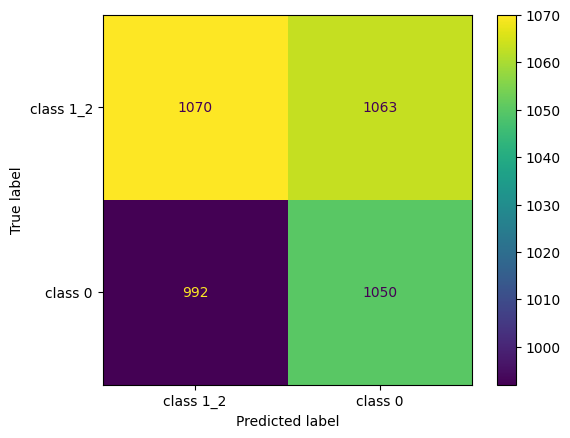



*********************************************
Train-set evaluate result:

534/534 [==============================] - 2s 3ms/step - loss: 0.8964 - accuracy: 0.8478
[0.8964493274688721, 0.8478260636329651]
534/534 [==============================] - 2s 3ms/step
Report for train set:

               precision    recall  f1-score   support

   class 1_2       0.87      0.82      0.84      8533
     class 0       0.83      0.87      0.85      8533

    accuracy                           0.85     17066
   macro avg       0.85      0.85      0.85     17066
weighted avg       0.85      0.85      0.85     17066



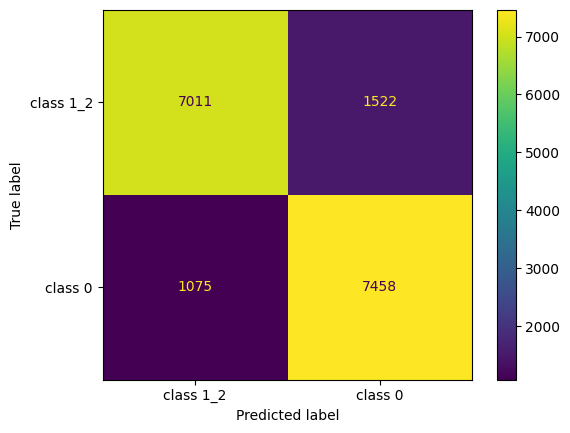

In [7]:
history = model.fit(train_features, train_target['Number of Bugs'], batch_size = 500, epochs = 5000,  validation_split = 0.2 , callbacks=[checkpoint])

print("\n\n*********************************************\n\n")

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

print("\n\n*********************************************\n\n")

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

############Pridecting results show######################

target_names = ['class 1_2', 'class 0']

print("\n\n*********************************************\nTest-set evaluate result:\n")

print(model.evaluate(test_features, test_target))
test_prediction_points = model.predict(test_features)  #Probability of each class
test_prediction =(test_prediction_points > 0.5).astype(numpy.int64)

print("Report for test set:\n\n", classification_report(test_target, test_prediction, target_names=target_names))
test_confusion_matrix = confusion_matrix(test_target, test_prediction)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix, display_labels=target_names)
test_disp.plot()
plt.show()

print("\n\n*********************************************\nTrain-set evaluate result:\n")

print(model.evaluate(train_features, train_target))
train_prediction_points = model.predict(train_features)  #Probability of each class
train_prediction =(train_prediction_points > 0.5).astype(numpy.int64)

print("Report for train set:\n\n", classification_report(train_target, train_prediction, target_names=target_names))
train_confusion_matrix = confusion_matrix(train_target, train_prediction)
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix, display_labels=target_names)
train_disp.plot()
plt.show()

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - ETA: 0s - loss: 0.0757 - accuracy: 0.9625
Epoch 3752: loss did not improve from 0.06759
2/2 [==============================] - 0s 206ms/step - loss: 0.0757 - accuracy: 0.9625 - val_loss: 7.2976 - val_accuracy: 0.5357
Epoch 3753/5000
2/2 [==============================] - ETA: 0s - loss: 0.0748 - accuracy: 0.9649
Epoch 3753: loss did not improve from 0.06759
2/2 [==============================] - 0s 180ms/step - loss: 0.0748 - accuracy: 0.9649 - val_loss: 7.5354 - val_accuracy: 0.5264
Epoch 3754/5000
2/2 [==============================] - ETA: 0s - loss: 0.0789 - accuracy: 0.9596
Epoch 3754: loss did not improve from 0.06759
2/2 [==============================] - 0s 143ms/step - loss: 0.0789 - accuracy: 0.9596 - val_loss: 7.2563 - val_accuracy: 0.5384
Epoch 3755/5000
2/2 [==============================] - ETA: 0s - loss: 0.0778 - accuracy: 0.9610
Epoch 3755: loss did not improve from 0.06759
2/2 [=

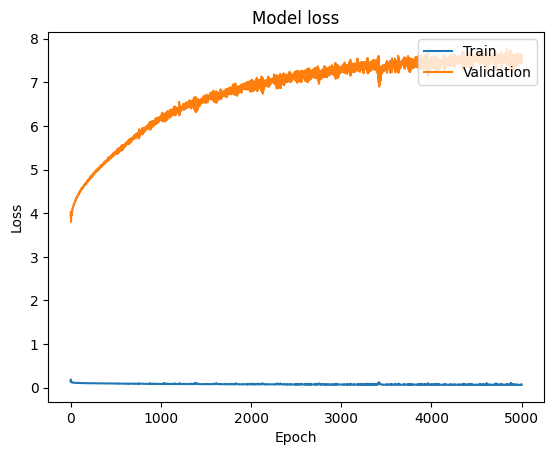



*********************************************




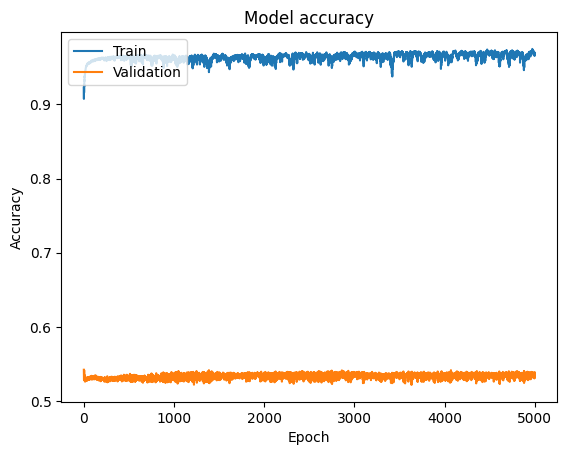



*********************************************
Test-set evaluate result:

131/131 [==============================] - 0s 3ms/step - loss: 7.6339 - accuracy: 0.5097
[7.63391637802124, 0.50970059633255]
131/131 [==============================] - 0s 3ms/step
Report for test set:

               precision    recall  f1-score   support

   class 1_2       0.52      0.51      0.52      2133
     class 0       0.50      0.51      0.50      2042

    accuracy                           0.51      4175
   macro avg       0.51      0.51      0.51      4175
weighted avg       0.51      0.51      0.51      4175



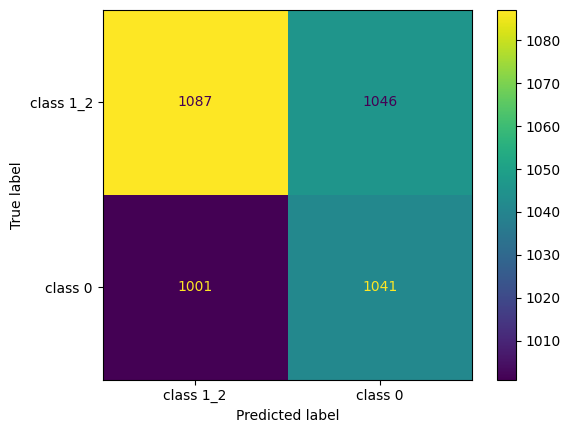



*********************************************
Train-set evaluate result:

534/534 [==============================] - 2s 4ms/step - loss: 1.5458 - accuracy: 0.8815
[1.5458064079284668, 0.8814601898193359]
534/534 [==============================] - 2s 3ms/step
Report for train set:

               precision    recall  f1-score   support

   class 1_2       0.90      0.86      0.88      8533
     class 0       0.87      0.90      0.88      8533

    accuracy                           0.88     17066
   macro avg       0.88      0.88      0.88     17066
weighted avg       0.88      0.88      0.88     17066



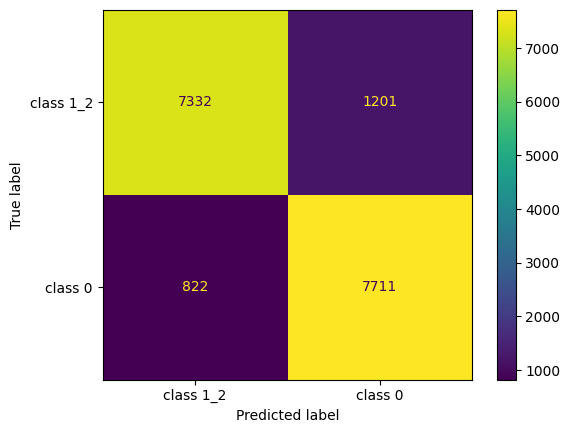

In [8]:
#***Model Continue Learning***#
#------------------------------#

model.load_weights(file_path)

history = model.fit(train_features, train_target['Number of Bugs'], batch_size = 8224, epochs = 5000,  validation_split = 0.2 , callbacks=[checkpoint])

print("\n\n*********************************************\n\n")

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

print("\n\n*********************************************\n\n")

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

############Pridecting results show######################

target_names = ['class 1_2', 'class 0']

print("\n\n*********************************************\nTest-set evaluate result:\n")

print(model.evaluate(test_features, test_target))
test_prediction_points = model.predict(test_features)  #Probability of each class
test_prediction =(test_prediction_points > 0.5).astype(numpy.int64)

print("Report for test set:\n\n", classification_report(test_target, test_prediction, target_names=target_names))
test_confusion_matrix = confusion_matrix(test_target, test_prediction)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix, display_labels=target_names)
test_disp.plot()
plt.show()

print("\n\n*********************************************\nTrain-set evaluate result:\n")

print(model.evaluate(train_features, train_target))
train_prediction_points = model.predict(train_features)  #Probability of each class
train_prediction =(train_prediction_points > 0.5).astype(numpy.int64)

print("Report for train set:\n\n", classification_report(train_target, train_prediction, target_names=target_names))
train_confusion_matrix = confusion_matrix(train_target, train_prediction)
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix, display_labels=target_names)
train_disp.plot()
plt.show()

In [10]:
checkpoint.best

0.0637253150343895

Test-set evaluate result:

131/131 [==============================] - 0s 2ms/step - loss: 7.7382 - accuracy: 0.5099
[7.738237380981445, 0.5099401473999023]
131/131 [==============================] - 0s 2ms/step
Report for test set:

               precision    recall  f1-score   support

   class 1_2       0.52      0.53      0.52      2133
     class 0       0.50      0.49      0.49      2042

    accuracy                           0.51      4175
   macro avg       0.51      0.51      0.51      4175
weighted avg       0.51      0.51      0.51      4175



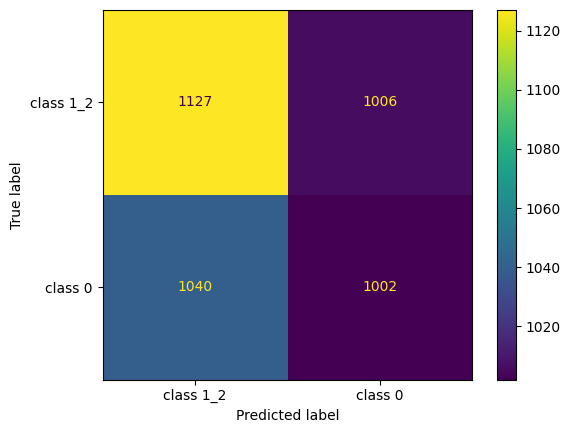



*********************************************
Train-set evaluate result:

534/534 [==============================] - 1s 2ms/step - loss: 1.5619 - accuracy: 0.8876
[1.561902403831482, 0.8875542283058167]
534/534 [==============================] - 1s 2ms/step
Report for train set:

               precision    recall  f1-score   support

   class 1_2       0.88      0.89      0.89      8533
     class 0       0.89      0.88      0.89      8533

    accuracy                           0.89     17066
   macro avg       0.89      0.89      0.89     17066
weighted avg       0.89      0.89      0.89     17066



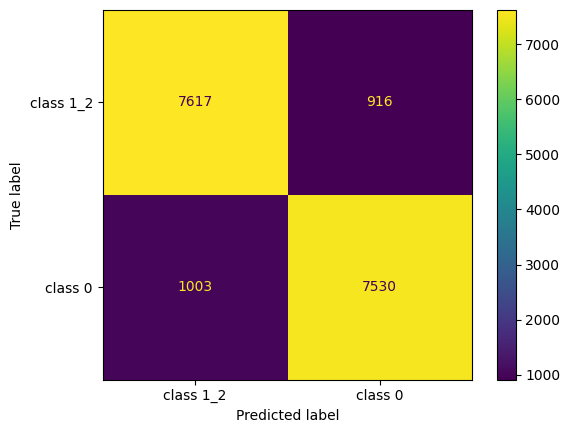

In [11]:
#***Best Model Test Only***#
#--------------------------#

model.load_weights(file_path)

############Pridecting results show######################

target_names = ['class 1_2', 'class 0']

print("Test-set evaluate result:\n")

print(model.evaluate(test_features, test_target))
test_prediction_points = model.predict(test_features)  #Probability of each class
test_prediction =(test_prediction_points > 0.5).astype(numpy.int64)

print("Report for test set:\n\n", classification_report(test_target, test_prediction, target_names=target_names))
test_confusion_matrix = confusion_matrix(test_target, test_prediction)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix, display_labels=target_names)
test_disp.plot()
plt.show()

print("\n\n*********************************************\nTrain-set evaluate result:\n")

print(model.evaluate(train_features, train_target))
train_prediction_points = model.predict(train_features)  #Probability of each class
train_prediction =(train_prediction_points > 0.5).astype(numpy.int64)

print("Report for train set:\n\n", classification_report(train_target, train_prediction, target_names=target_names))
train_confusion_matrix = confusion_matrix(train_target, train_prediction)
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix, display_labels=target_names)
train_disp.plot()
plt.show()

In [12]:
model.save("/content/drive/MyDrive/new_df/best_model_by_class0")